In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('train_pca.csv')
train_clean = pd.read_csv("train_clean.csv")
df = df.drop(['Unnamed: 0'],axis=1)

In [3]:
df.head()

,0,1,2
0,4.486696,0.928857,-2.276332
1,5.181728,1.123534,0.952564
2,-3.783016,0.723012,-1.018953
3,-3.632713,-0.285356,-1.718415
4,-4.009857,0.668512,-0.138392


In [4]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

# K-means

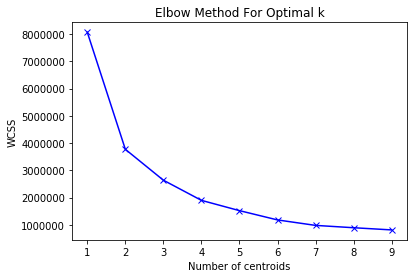

In [5]:
wcss = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df)
    wcss.append(km.inertia_)
plt.plot(K, wcss, 'bx-')
plt.xlabel('Number of centroids')
plt.ylabel('WCSS')
plt.title('Elbow Method For Optimal k')
plt.show()

In [12]:
df1 = df.sample(n = 1000)
pca=pd.DataFrame(df1)
pca.columns=['First Component','Second Component','Third Component']

Text(0.5, 0.92, 'K-means Model')

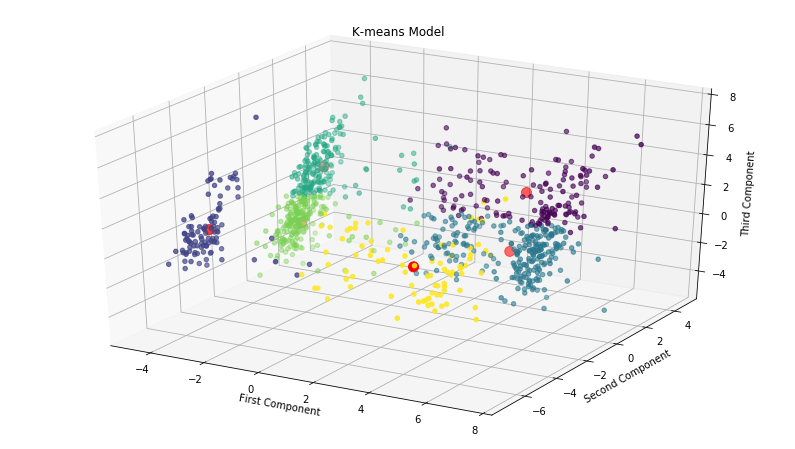

In [108]:
#as the graph shows, we decide to assign k=5.
kmeans = KMeans(n_clusters=6, random_state=0).fit(pca)
y_sample = kmeans.predict(pca)

#plotting the results 
fig = plt.figure(figsize=(14,8))
ax = plt.axes(projection='3d')
ax.scatter3D(pca['First Component'], pca['Second Component'], pca['Third Component'], c=y_sample, cmap='viridis');
centers = kmeans.cluster_centers_
#plt.scatter(centers[:, 0], centers[:, 1], c='red', s=50)
ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2],  c='red', s=100)
ax.set_xlabel('First Component')
ax.set_ylabel('Second Component')
ax.set_zlabel('Third Component')
ax.set_title('K-means Model')

In [64]:
from sklearn.mixture import GaussianMixture

In [74]:
gmm = GaussianMixture(n_components=6).fit(pca)

In [75]:
y_sample2 = gmm.predict(pca)

Text(0.5, 0.92, 'Gaussian Mixture Model')

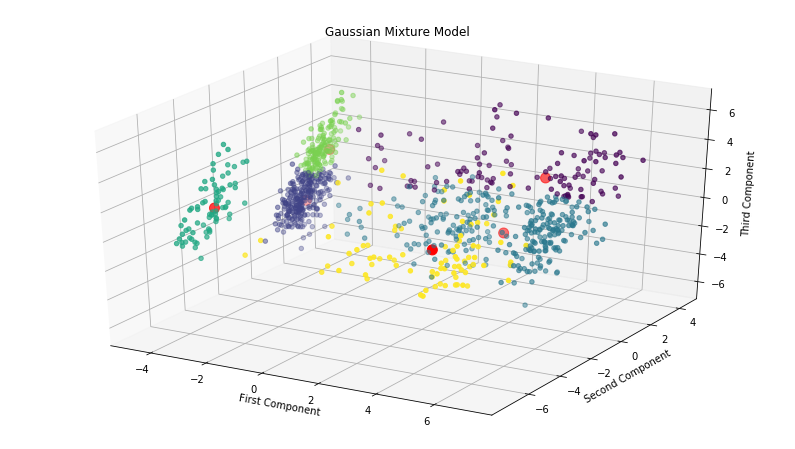

In [77]:
fig = plt.figure(figsize=(14,8))
ax = plt.axes(projection='3d')
ax.scatter3D(pca['First Component'], pca['Second Component'], pca['Third Component'], c=y_sample2, cmap='viridis');
centers = kmeans.cluster_centers_
#plt.scatter(centers[:, 0], centers[:, 1], c='red', s=50)
ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2],  c='red', s=100)
ax.set_xlabel('First Component')
ax.set_ylabel('Second Component')
ax.set_zlabel('Third Component')
ax.set_title('Gaussian Mixture Model')

In [73]:
train_clean = train_clean.drop(['Unnamed: 0'],axis=1)

In [109]:
# run the k-means model
kmeans = KMeans(n_clusters=5, random_state=0).fit(pca)
y_kmeans = kmeans.predict(df)

In [110]:
y_kmeans = pd.DataFrame(y_kmeans, )
y_kmeans = y_kmeans.rename(columns={0: "Class"})

In [111]:
kmeans_train = pd.concat([train_clean, y_kmeans], axis=1, sort=False)

In [112]:
Class0 = kmeans_train.loc[kmeans_train["Class"] == 0, ]
Class1 = kmeans_train.loc[kmeans_train["Class"] == 1, ]
Class2 = kmeans_train.loc[kmeans_train["Class"] == 2, ]
Class3 = kmeans_train.loc[kmeans_train["Class"] == 3, ]
Class4 = kmeans_train.loc[kmeans_train["Class"] == 4, ]
Class5 = kmeans_train.loc[kmeans_train["Class"] == 5, ]
#Class6 = kmeans_train.loc[kmeans_train["Class"] == 6, ]
#Class7 = kmeans_train.loc[kmeans_train["Class"] == 7, ]
#Class8 = kmeans_train.loc[kmeans_train["Class"] == 8, ]
#Class9 = kmeans_train.loc[kmeans_train["Class"] == 9, ]

In [28]:
def perc_class_default(class_x):
    perc = len(class_x.loc[class_x["TARGET"] == 1, ])/len(class_x)
    return perc

In [114]:
for i in range(len(kmeans_train.Class.unique())):
    x = kmeans_train.loc[kmeans_train["Class"] == i, ]
    print("the default rate of class{} is {}".format(i, perc_class_default(x)))

the default rate of class0 is 0.07334487414168689
the default rate of class1 is 0.08185280344029593
the default rate of class2 is 0.05955659597906913
the default rate of class3 is 0.04770371491261254
the default rate of class4 is 0.11120744010088272


In [148]:
kmeans_train.to_csv("kmeans_train.csv")

In [21]:
# Compute clustering with MeanShift
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs
# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(df, quantile=0.1, n_samples=1000)
bandwidth

2.5282977410783496

In [22]:
ms = MeanShift(bandwidth=2.528,bin_seeding=True)
ms.fit(pca)
pred = ms.predict(pca)
labels=ms.labels_
cluster_centers = ms.cluster_centers_
cluster_centers

array([[-3.82028123,  0.93512491, -0.57351812],
       [ 4.55232617,  1.09815819, -0.61385216],
       [-3.45907198, -5.40418899,  0.59308496],
       [ 4.05106963, -5.32353134,  0.04741125],
       [-2.8173807 ,  3.13275832,  8.83248149]])

Text(0.5, 0.92, 'Mean-Shift Model')

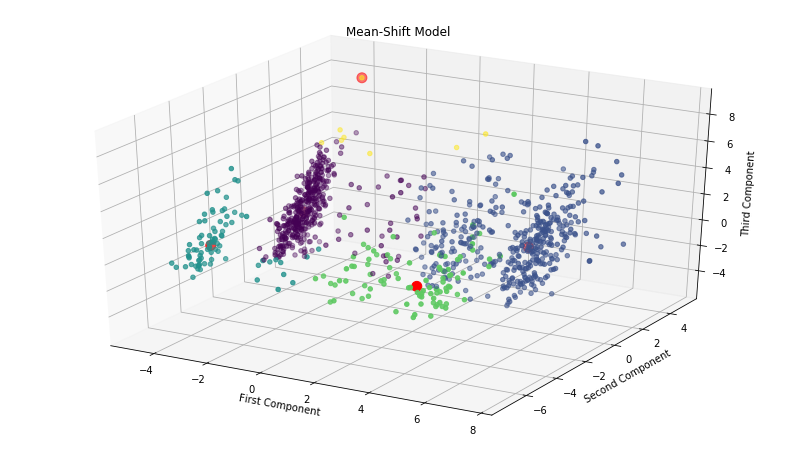

In [23]:
#plotting the results 
fig = plt.figure(figsize=(14,8))
ax = plt.axes(projection='3d')
ax.scatter3D(pca['First Component'], pca['Second Component'], pca['Third Component'], c=pred, cmap='viridis');
clusters = ms.cluster_centers_
#plt.scatter(centers[:, 0], centers[:, 1], c='red', s=50)
ax.scatter(clusters[:, 0], clusters[:, 1], clusters[:, 2],  c='red', s=100)
ax.set_xlabel('First Component')
ax.set_ylabel('Second Component')
ax.set_zlabel('Third Component')
ax.set_title('Mean-Shift Model')

In [24]:
y_shift = ms.predict(df)
y_shift = pd.DataFrame(y_shift, )
y_shift = y_shift.rename(columns={0: "Class"})

In [25]:
shift_train = pd.concat([train_clean, y_shift], axis=1, sort=False)

In [26]:
C0 = shift_train.loc[shift_train["Class"] == 0, ]
C1 = shift_train.loc[shift_train["Class"] == 1, ]
C2 = shift_train.loc[shift_train["Class"] == 2, ]
C3 = shift_train.loc[shift_train["Class"] == 3, ]
C4 = shift_train.loc[shift_train["Class"] == 4, ]
#C5 = shift_train.loc[shift_train["Class"] == 5, ]

In [29]:
for i in range(len(shift_train.Class.unique())):
    x = shift_train.loc[shift_train["Class"] == i, ]
    print("the default rate of class{} is {}".format(i, perc_class_default(x)))

the default rate of class0 is 0.10026905829596412
the default rate of class1 is 0.0734569388925363
the default rate of class2 is 0.0595303300013693
the default rate of class3 is 0.04767353165522502
the default rate of class4 is 0.0367965367965368


In [ ]:
## Hierarchical Clustering

In [5]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [6]:
df2 = df.sample(n = 1000)

In [7]:
Z = linkage(df2, 'ward')

In [8]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

c, coph_dists = cophenet(Z, pdist(df2))
print (c)

0.783368878451817


In [9]:
print (Z[45])

[4.00000000e+02 7.94000000e+02 1.30914394e-01 2.00000000e+00]


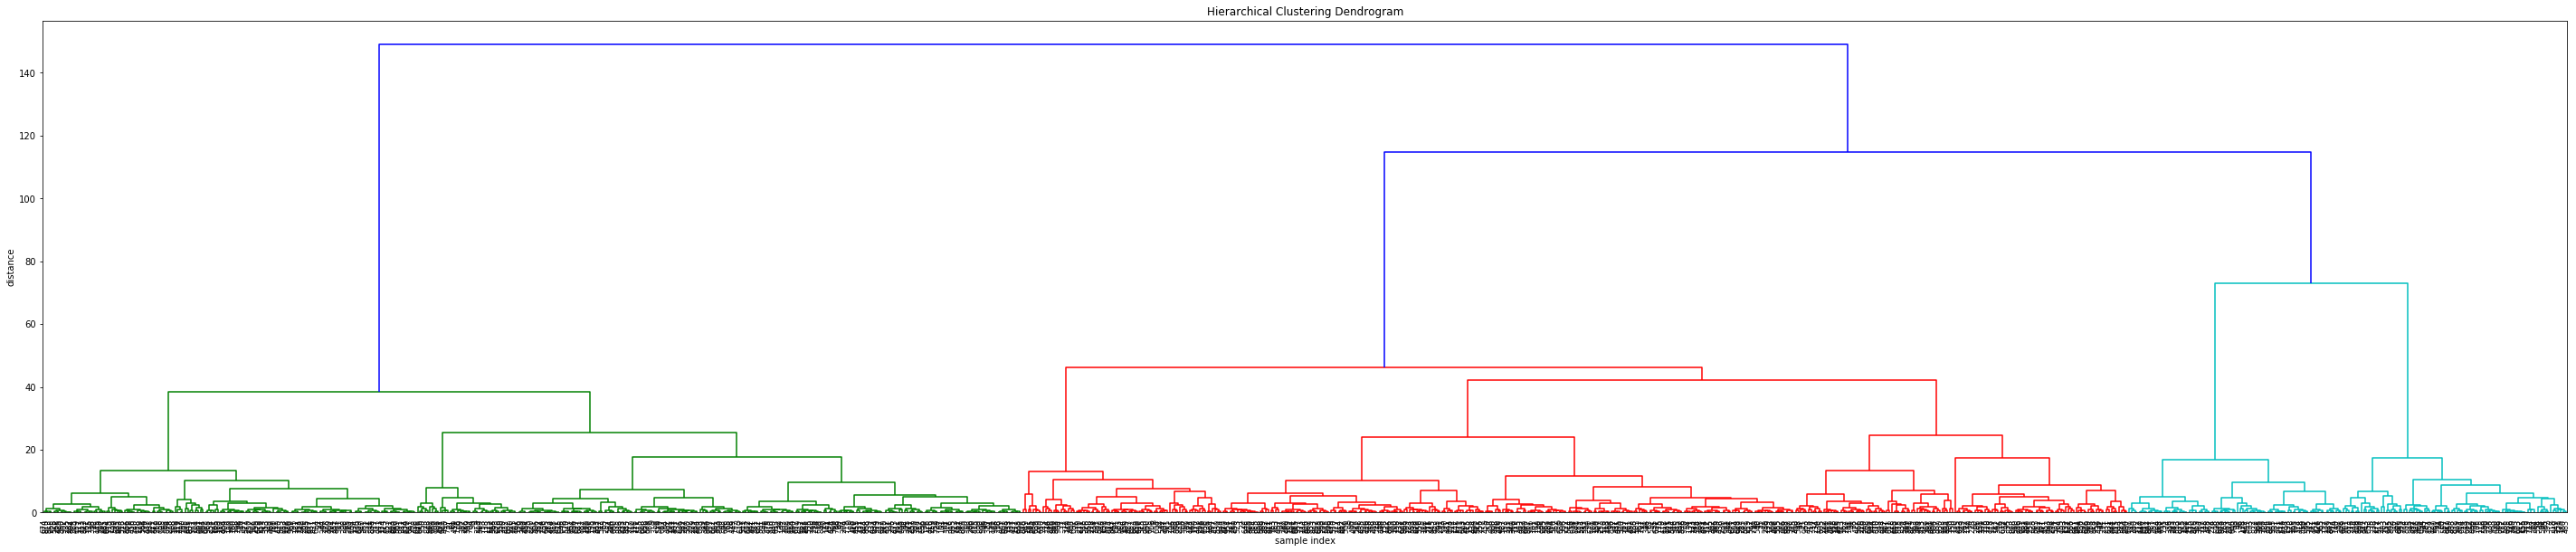

In [10]:
plt.figure(figsize=(50, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(Z, leaf_rotation=90., leaf_font_size=8.
)
plt.show()

In [11]:
print (Z[-4:, 2])

[ 46.07040455  72.98663959 114.84069706 149.0832592 ]


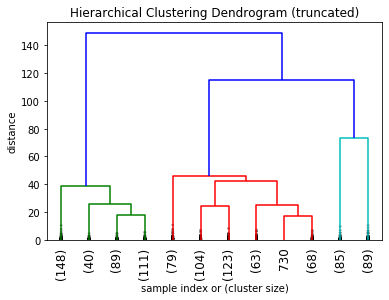

In [12]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(Z, truncate_mode='lastp', p=12, leaf_rotation=90., leaf_font_size=12., show_contracted=True)
plt.show()

In [13]:
from scipy.cluster.hierarchy import fcluster
max_d = 100
clusters = fcluster(Z, max_d, criterion='distance')

In [14]:
unique_elements, counts_elements = np.unique(clusters, return_counts=True)
print(np.asarray((unique_elements, counts_elements)))

[[  1   2   3]
 [388 438 174]]


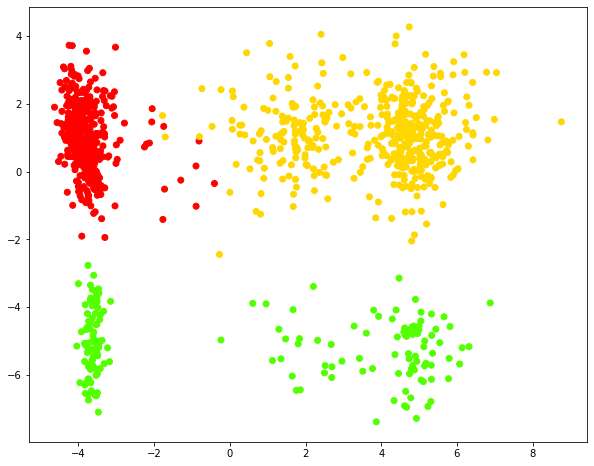

In [15]:
plt.figure(figsize=(10, 8))
plt.scatter(df2.iloc[:, 0], df2.iloc[:, 1], c=clusters, cmap='prism', )
plt.show()

Text(0.5, 0.92, 'Hierarchical Clustering')

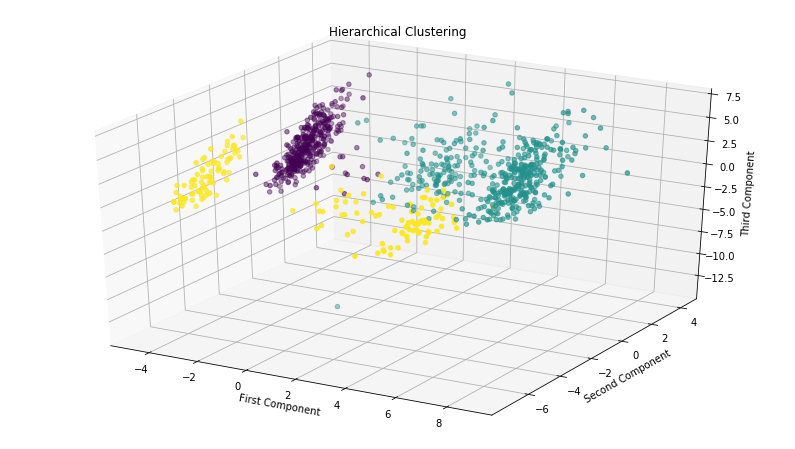

In [16]:
fig = plt.figure(figsize=(14,8))
ax = plt.axes(projection='3d')
ax.scatter3D(df2.iloc[:,0], df2.iloc[:, 1], df2.iloc[:, 2], c=clusters, cmap='viridis');
#clusters = clusters
#plt.scatter(centers[:, 0], centers[:, 1], c='red', s=50)
#ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2],  c='red', s=100)

ax.set_xlabel('First Component')
ax.set_ylabel('Second Component')
ax.set_zlabel('Third Component')
ax.set_title('Hierarchical Clustering')